In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load Cleaned Dataset
df = pd.read_csv("cleaned_reviews.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,cleaned_text,orig_length,cleaned_length,sentiment
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600,jace rankin may be short but hes nothing to me...,2921,2826,negative
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400,great short read i didnt want to put it down s...,371,354,positive
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400,ill start by saying this is the first of four ...,416,389,negative
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400,aggie is angela lansbury who carries pocketboo...,336,327,negative
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000,i did not expect this type of book to be in li...,90,90,positive


In [3]:
# Step 3: Check dataset information
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
df["sentiment"].value_counts()

Rows: 12000
Columns: 15


sentiment
negative    6000
positive    6000
Name: count, dtype: int64

In [4]:
# Step 4: Train-Test Split
X = df["cleaned_text"]          # text after cleaning
y = df["sentiment"]             # positive / negative label

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((9600,), (2400,))

In [5]:
# Step 5: TF-IDF Vectorization
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),     # unigrams + bigrams
    stop_words="english"
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape

((9600, 5000), (2400, 5000))

In [6]:
# Step 6: Train Logistic Regression Model
model = LogisticRegression(max_iter=2000)

model.fit(X_train_tfidf, y_train)
print("Model training completed successfully!")

Model training completed successfully!


In [7]:
# Step 7: Predictions
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.83125

In [8]:
# Step 8: Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.81      0.83      1200
    positive       0.82      0.85      0.83      1200

    accuracy                           0.83      2400
   macro avg       0.83      0.83      0.83      2400
weighted avg       0.83      0.83      0.83      2400



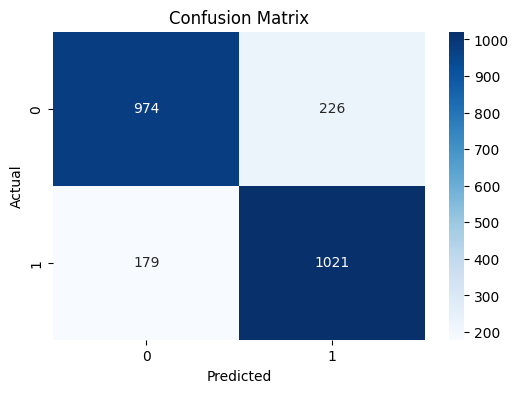

In [9]:
# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
# Step 10: Save Model + Vectorizer
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print("Model and Vectorizer saved successfully!")

Model and Vectorizer saved successfully!
